In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable     
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point   
   -- isf: greater than a point  
- rvs for random values 

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

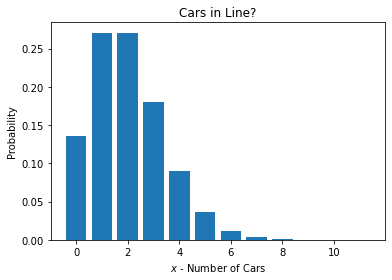

In [2]:
x = np.arange(0, 12)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)
plt.title('Cars in Line?')
plt.xlabel('$x$ - Number of Cars')
plt.ylabel('Probability')
plt.show()

#### - What is the probability that no cars drive up in the noon hour?

#### Simluated Solution

In [3]:
cars = np.random.poisson(2,1000000)
cars

array([4, 3, 2, ..., 2, 3, 1])

In [4]:
(cars == 0).mean()

0.135551

#### Theorectical Solution

In [5]:
cars_dist = stats.poisson(2)

In [6]:
cars_dist.pmf(0)

0.1353352832366127

#### - What is the probability that 3 or more cars come through the drive through?

#### Simulated Solution

In [7]:
(cars >= 3).mean()

0.322989

#### Theorectical Solution

In [8]:
cars_dist.sf(2)

0.32332358381693654

#### - How likely is it that the drive through gets at least 1 car?

#### Simulated Solution

In [9]:
(cars >= 1).mean()

0.864449

#### Theorectical Solution

In [10]:
cars_dist.sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [11]:
# Generates an array of 10,000 values based on a normal distribution around a mean of 3 and a std dev of 0.3
grades = np.random.normal(3,.3, 100000)
grades

array([3.98836409, 3.07447809, 3.66010078, ..., 2.89360041, 3.31048512,
       3.15828001])

In [12]:
μ = 3
σ = .3

grades_dist = stats.norm(μ, σ)

#### - What grade point average is required to be in the top 5% of the graduating class?

#### Simulated Solution

In [13]:
# Calculates the 95th percentile of the random values
pd.Series(grades).quantile(.95)

3.495502264378178

#### Theorectical Solution

In [14]:
grades_dist.isf(.05)

3.4934560880854417

#### - What GPA constitutes the bottom 15% of the class?

#### Simulated Solution

In [15]:
# Calculates the 15th percentile of the random values
pd.Series(grades).quantile(.15)

2.6878058079099474

#### Theorectical Solution

In [16]:
grades_dist.ppf(.15)

2.689069983151863

#### - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

#### Simulated Solution

In [17]:
pd.Series(grades).quantile(.30)

2.841862406397239

In [18]:
#need to find the 3rd decile from the bottom, or bottom 30th percent

grades_dist.ppf(.30) #This will give me the lowest gpa acceptable

2.842679846187588

#### - If I have a GPA of 3.5, what percentile am I in?

#### Simulated Solution

In [19]:
1 - (grades >= 3.5).mean()

0.95178

#### Theoretical Solution

In [20]:
grades_dist.cdf(3.5)

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [21]:
# Generates an array of 10,000 values based on a normal distribution around a mean of 3 and a std dev of 0.3
ctr = np.random.normal(4326,.02, 100000)
ctr

array([4325.98695878, 4325.94862493, 4326.0013119 , ..., 4326.00501773,
       4326.00741662, 4326.0118039 ])

#### Simulated Solution

In [22]:
ctr = (np.random.choice([1, 0], p=[.02, .98], size=(100000, 4326)))
ctr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
ctr.sum(axis=1)

array([80, 89, 85, ..., 91, 69, 89])

In [24]:
(ctr.sum(axis=1) >= 97).mean()

0.14075

#### Theorectical Solution 

In [25]:
ctr_dist = stats.binom(4326, .02)

ctr_dist.sf(96)

0.13975823631416448

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

#### Simulation Solution

In [26]:
guesses = (np.random.choice([1, 0], p=[.01, .99], size=(100000, 60)))
guesses

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
guesses.sum(axis=1) >= 1

array([False,  True, False, ..., False,  True, False])

In [28]:
(guesses.sum(axis=1) >= 1).mean()

0.45223

#### Theoretical Solution

In [29]:
stats.binom(60, .01).sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

- How likely is it that the break area gets cleaned up each day?


#### Simulated Solution

In [30]:
breakroom = np.random.choice([1 , 0], size = (10_000, 59), p = [.03, .97])
breakroom

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
(breakroom.sum(axis=1)> 0).mean()

0.8283

#### Theoretical Solution

In [32]:
stats.binom(59, .03).sf(0)

0.8342199288437352

- How likely is it that it goes two days without getting cleaned up? All week?


#### Simulated Solution

In [33]:
(breakroom.sum(axis=1) == 2).mean()

0.2719

In [34]:
(breakroom.sum(axis=1) == 7).mean()

0.0017

#### Theoretical Solution

In [35]:
stats.binom(59, .03).pmf(2)

0.27131972746682126

In [36]:
stats.binom(59, .03).pmf(7)

0.0015308182645021292

- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable     
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point   
   -- isf: greater than a point  
- rvs for random values 

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

#### Simulated Simulation

In [37]:
μ= 15 * 2
σ = 3 * 2 


lunchbreak_time = 60
minutes_to_get_food = 10
minutes_to_eat = 15


spare_time = lunchbreak_time - minutes_to_get_food - minutes_to_eat - 2

lunchtime = np.random.normal(μ, σ, size = 10000)


(lunchtime <= spare_time).mean()

0.6962

#### Theoretical Simulation

In [38]:
# this will make the mean how long it takes a person to order
μ = 15 * 2 

# taking standard deviation of people in line * minutes it take each person to order
# this converts the standard deviation from people to minutes
σ = 3 * 2 

lunchbreak_time = 60
minutes_to_get_food = 10
minutes_to_eat = 15

spare_time = lunchbreak_time - minutes_to_get_food - minutes_to_eat - 2

stats.norm(μ, σ).cdf(spare_time)

0.6914624612740131

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [39]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
    
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


- What percent of employees earn less than 60,000?

In [40]:
μ = salaries.salary.mean()
σ = salaries.salary.std()

In [41]:
stats.norm(μ, σ).cdf(60000)

0.24385742480214423

- What percent of employees earn more than 95,000?

In [42]:
stats.norm(μ, σ).sf(95_000)

0.09208819199804053

- What percent of employees earn between 65,000 and 80,000?

In [43]:
np.diff(stats.norm(μ, σ).cdf([65000, 80000]))

array([0.33506057])

- What do the top 5% of employees make?

In [44]:
stats.norm(μ, σ).isf(.05)

100484.64454102777